# IMPORT PACKAGES

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.base import model
from statsmodels.stats.outliers_influence import variance_inflation_factor

## BELOW IS SOME INITIAL EDA AND WORK DONE USING SPLITS ON YEARS: SPECIFICALLY 2000 (that we ended up not doing)

In [108]:
train2000 = pd.read_csv("train_2000.csv")
test2000 = pd.read_csv("test_2000.csv")
train2000

Life Expectancy at birth   BMI  Alcohol  gender_dummy  Africa  Asia  \
0                       54.57  21.3    0.009             0       0     1   
1                       51.54  21.4    1.580             0       1     0   
2                       77.74  26.0   11.150             0       0     0   
3                       45.85  20.4    3.530             1       1     0   
4                       69.55  25.2    0.530             0       0     1   
..                        ...   ...      ...           ...     ...   ...   
242                     80.99  25.1    8.380             1       0     0   
243                     80.98  24.2    6.450             1       0     0   
244                     76.00  26.8   15.900             0       0     0   
245                     71.91  24.8    2.080             0       0     0   
246                     71.94  25.7    0.670             0       0     1   

     Europe  North America  Oceania  South America  ...  \
0         0              0        0              0  ...   
1         0              0        0              0  ...   
2         1              0        0              0  ...   
3         0              0        0              0  ...   
4         0              0        0              0  ...   
..      ...            ...      ...            ...  ...   
242       0              1        0              0  ...   
243       1              0        0              0  ...   
244       0              0        1              0  ...   
245       0              0        0              1  ...   
246       0              0        0              0  ...   

     unintentional_injuries  intentional_injuries  mental_substance_disorders  \
0                  7.461039              6.325029                    0.157156   
1                  1.037448              0.964722                    0.107617   
2                  0.050529              0.030070                    0.007473   
3                  1.430166              5.221839                    0.017286   
4                  0.228153              0.043620                    0.011312   
..                      ...                   ...                         ...   
242                1.981508              0.709162                    0.038980   
243                0.945442              0.478559                    0.091945   
244                0.688792              0.425933                    0.051722   
245                3.456177              3.282918                    0.430895   
246                9.359903              4.847335                    0.325184   

     sense_organ  musculoskeletal  congenital  sudden_infant_death_syndrome  \
0       0.000000         0.024572    2.680099                      0.321229   
1       0.000000         0.013777    0.340081                      0.027928   
2       0.000000         0.000994    0.002588                      0.000791   
3       0.000000         0.014884    0.590258                      0.046397   
4       0.000000         0.001136    0.042607                      0.002023   
..           ...              ...         ...                           ...   
242     0.005025         0.232182    0.267330                      0.003577   
243     0.000000         0.097470    0.108949                      0.008982   
244     0.000981         0.066188    0.117034                      0.022519   
245     0.000000         0.028995    1.255824                      0.040104   
246     0.000000         0.202339    9.246918                      0.864971   

     skin_diseases  diabetes_mellitus  oral_conditions  
0         0.019315           0.666837         0.000000  
1         0.013815           0.445428         0.000000  
2         0.000337           0.011557         0.000000  
3         0.034111           0.587930         0.000000  
4         0.025771           0.133609         0.000000  
..             ...                ...              ...  
242       0.079590           0.847396         0.002024  
243  

In [109]:
y_train2000 = train2000['Life Expectancy at birth']
X_train2000 = train2000.drop(['Life Expectancy at birth'], axis=1)
y_test2000 = test2000['Life Expectancy at birth']
X_test2000 = test2000.drop(['Life Expectancy at birth'], axis=1)
X_train2000

BMI  Alcohol  gender_dummy  Africa  Asia  Europe  North America  \
0    21.3    0.009             0       0     1       0              0   
1    21.4    1.580             0       1     0       0              0   
2    26.0   11.150             0       0     0       1              0   
3    20.4    3.530             1       1     0       0              0   
4    25.2    0.530             0       0     1       0              0   
..    ...      ...           ...     ...   ...     ...            ...   
242  25.1    8.380             1       0     0       0              1   
243  24.2    6.450             1       0     0       1              0   
244  26.8   15.900             0       0     0       0              0   
245  24.8    2.080             0       0     0       0              0   
246  25.7    0.670             0       0     1       0              0   

     Oceania  South America  Infectious_and_parasitic_diseases  ...  \
0          0              0                          35.236478  ...   
1          0              0                           7.424197  ...   
2          0              0                           0.003977  ...   
3          0              0                          21.496385  ...   
4          0              0                           0.032684  ...   
..       ...            ...                                ...  ...   
242        0              0                           0.346996  ...   
243        0              0                           0.084068  ...   
244        1              0                           0.073448  ...   
245        0              1                           3.089748  ...   
246        0              0                           5.138999  ...   

     unintentional_injuries  intentional_injuries  mental_substance_disorders  \
0                  7.461039              6.325029                    0.157156   
1                  1.037448              0.964722                    0.107617   
2                  0.050529              0.030070                    0.007473   
3                  1.430166              5.221839                    0.017286   
4                  0.228153              0.043620                    0.011312   
..                      ...                   ...                         ...   
242                1.981508              0.709162                    0.038980   
243                0.945442              0.478559                    0.091945   
244                0.688792              0.425933                    0.051722   
245                3.456177              3.282918                    0.430895   
246                9.359903              4.847335                    0.325184   

     sense_organ  musculoskeletal  congenital  sudden_infant_death_syndrome  \
0       0.000000         0.024572    2.680099                      0.321229   
1       0.000000         0.013777    0.340081                      0.027928   
2       0.000000         0.000994    0.002588                      0.000791   
3       0.000000         0.014884    0.590258                      0.046397   
4       0.000000         0.001136    0.042607                      0.002023   
..           ...              ...         ...                           ...   
242     0.005025         0.232182    0.267330                      0.003577   
243     0.000000         0.097470    0.108949                      0.008982   
244     0.000981         0.066188    0.117034                      0.022519   
245     0.000000         0.028995    1.255824                      0.040104   
246     0.000000         0.202339    9.246918                      0.864971   

     skin_diseases  diabetes_mellitus  oral_conditions  
0         0.019315           0.666837         0.000000  
1         0.013815           0.445428         0.000000  
2         0.000337           0.011557         0.000000  
3         0.034111           0.587930         0.000000  
4         0.025771           0.133609         0.000000  
..          

In [110]:
# calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

In [111]:
X_col = X_train2000.columns.values.tolist()
X_VIF = pd.DataFrame(VIF(train2000, X_col))
X_VIF

/Users/shannonzhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/shannonzhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


0
BMI                                  2.208191
Alcohol                              1.796163
gender_dummy                         1.440294
Africa                                    inf
Asia                                      inf
Europe                                    inf
North America                             inf
Oceania                                   inf
South America                             inf
Infectious_and_parasitic_diseases   52.330556
Respiratory_infectious             154.612071
neonatal_conditions                117.494658
nutritional_deficiencies             4.689739
endocrine_blood_immune_disorders    12.876327
cardiovascular_disease             188.544769
respiratory_diseases               170.299790
digestive_diseases                  72.577170
genitourinary_diseases             126.955853
malignant_neoplasms                181.126575
neurological_conditions             89.324198
unintentional_injuries             190.332764
intentional_injuries                14.726765
mental_substance_disorders          24.341849
sense_organ                          3.960994
musculoskeletal                     32.643748
congenital                         107.295791
sudden_infant_death_syndrome        28.441298
skin_diseases                       26.438579
diabetes_mellitus                   36.688644
oral_conditions                      7.729015

In [112]:
from tabulate import tabulate 

print(tabulate(X_VIF, showindex=True, headers='keys', tablefmt='psql'))

+-----------------------------------+-----------+
|                                   |         0 |
|-----------------------------------+-----------|
| BMI                               |   2.20819 |
| Alcohol                           |   1.79616 |
| gender_dummy                      |   1.44029 |
| Africa                            | inf       |
| Asia                              | inf       |
| Europe                            | inf       |
| North America                     | inf       |
| Oceania                           | inf       |
| South America                     | inf       |
| Infectious_and_parasitic_diseases |  52.3306  |
| Respiratory_infectious            | 154.612   |
| neonatal_conditions               | 117.495   |
| nutritional_deficiencies          |   4.68974 |
| endocrine_blood_immune_disorders  |  12.8763  |
| cardiovascular_disease            | 188.545   |
| respiratory_diseases              | 170.3     |
| digestive_diseases                |  72.5772  |


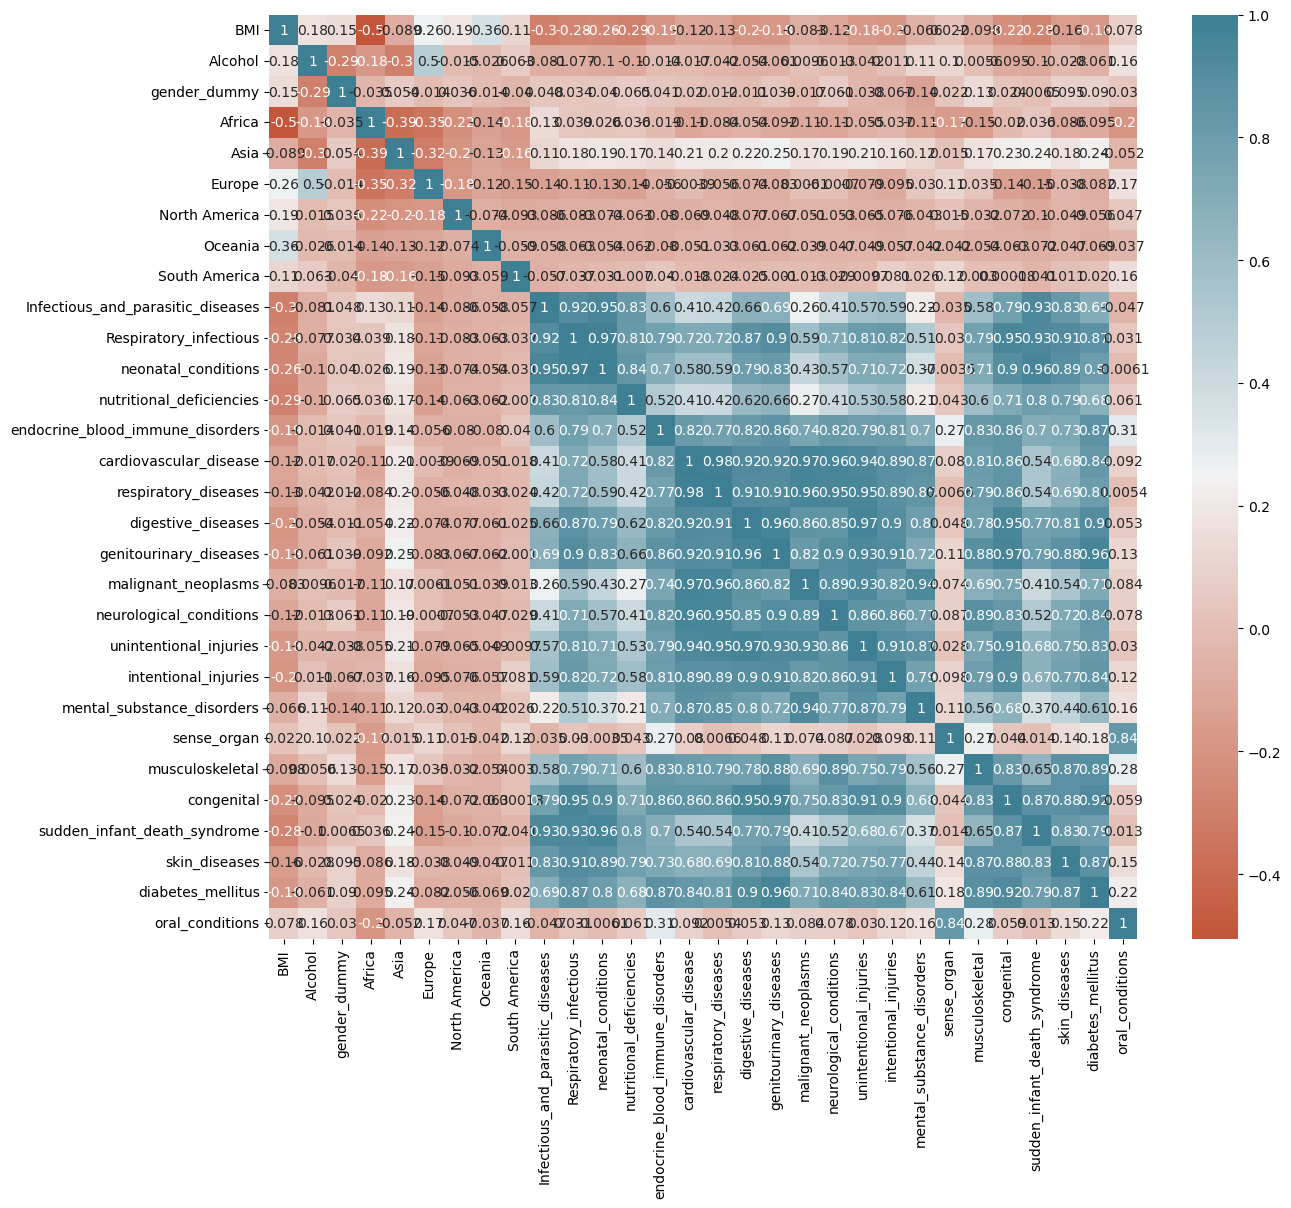

In [113]:
plt.figure(figsize=(14, 12))
cor2000 = X_train2000.corr()
sns.heatmap(cor2000, annot=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

In [114]:
y_test2000.info()

<class 'pandas.core.series.Series'>
RangeIndex: 107 entries, 0 to 106
Series name: Life Expectancy at birth
Non-Null Count  Dtype  
--------------  -----  
107 non-null    float64
dtypes: float64(1)
memory usage: 984.0 bytes


In [115]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor

grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201)}
cv = KFold(n_splits=5, random_state=1, shuffle=True)

dtr = DecisionTreeRegressor()
dtr_cv_acc = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2', cv=cv, verbose=0) # default scoring metric to optimize is accuracy, used as default if none given.
dtr_cv_acc.fit(X_train2000, y_train2000)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 ,...
       0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755,
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ])},
             sco

In [116]:
print('Grid best parameter ccp_alpha (best r2): ', dtr_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (best r2): ', dtr_cv_acc.best_score_)

Grid best parameter ccp_alpha (best r2):  0.081
Grid best score (best r2):  0.6378174322045893


In [117]:
acc = dtr_cv_acc.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtr_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20) #chart showing our GridSearch to maximize validation accuracy

ccp alpha  Validation Accuracy
0        0.0             0.572419
1     0.0005             0.571875
2      0.001             0.580509
3     0.0015             0.579244
4      0.002             0.622393
5     0.0025             0.593736
6      0.003             0.564509
7     0.0035             0.567609
8      0.004             0.627052
9     0.0045             0.608041
10     0.005             0.587273
11    0.0055             0.595081
12     0.006             0.633362
13    0.0065             0.608910
14     0.007             0.597557
15    0.0075             0.612818
16     0.008             0.598517
17    0.0085             0.609339
18     0.009             0.585793
19    0.0095             0.589504

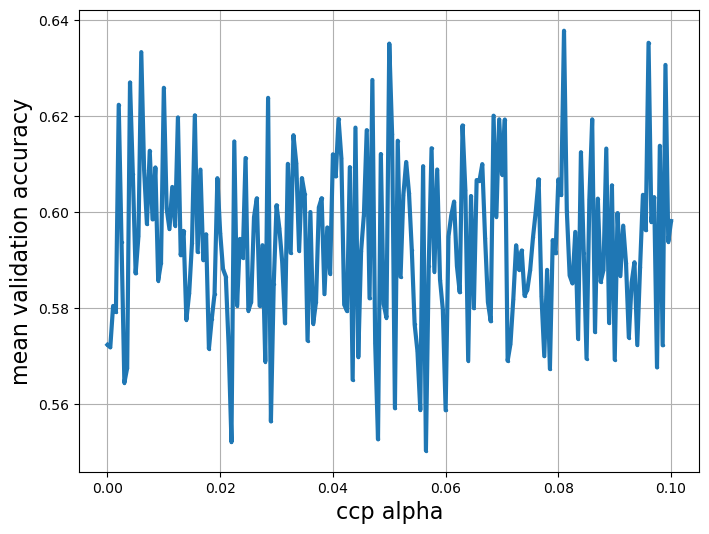

In [118]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16) #looking at our MAE by ccp_alpha refinement, and what ccp_alpha helps maximize MAE
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [119]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Node count = 107


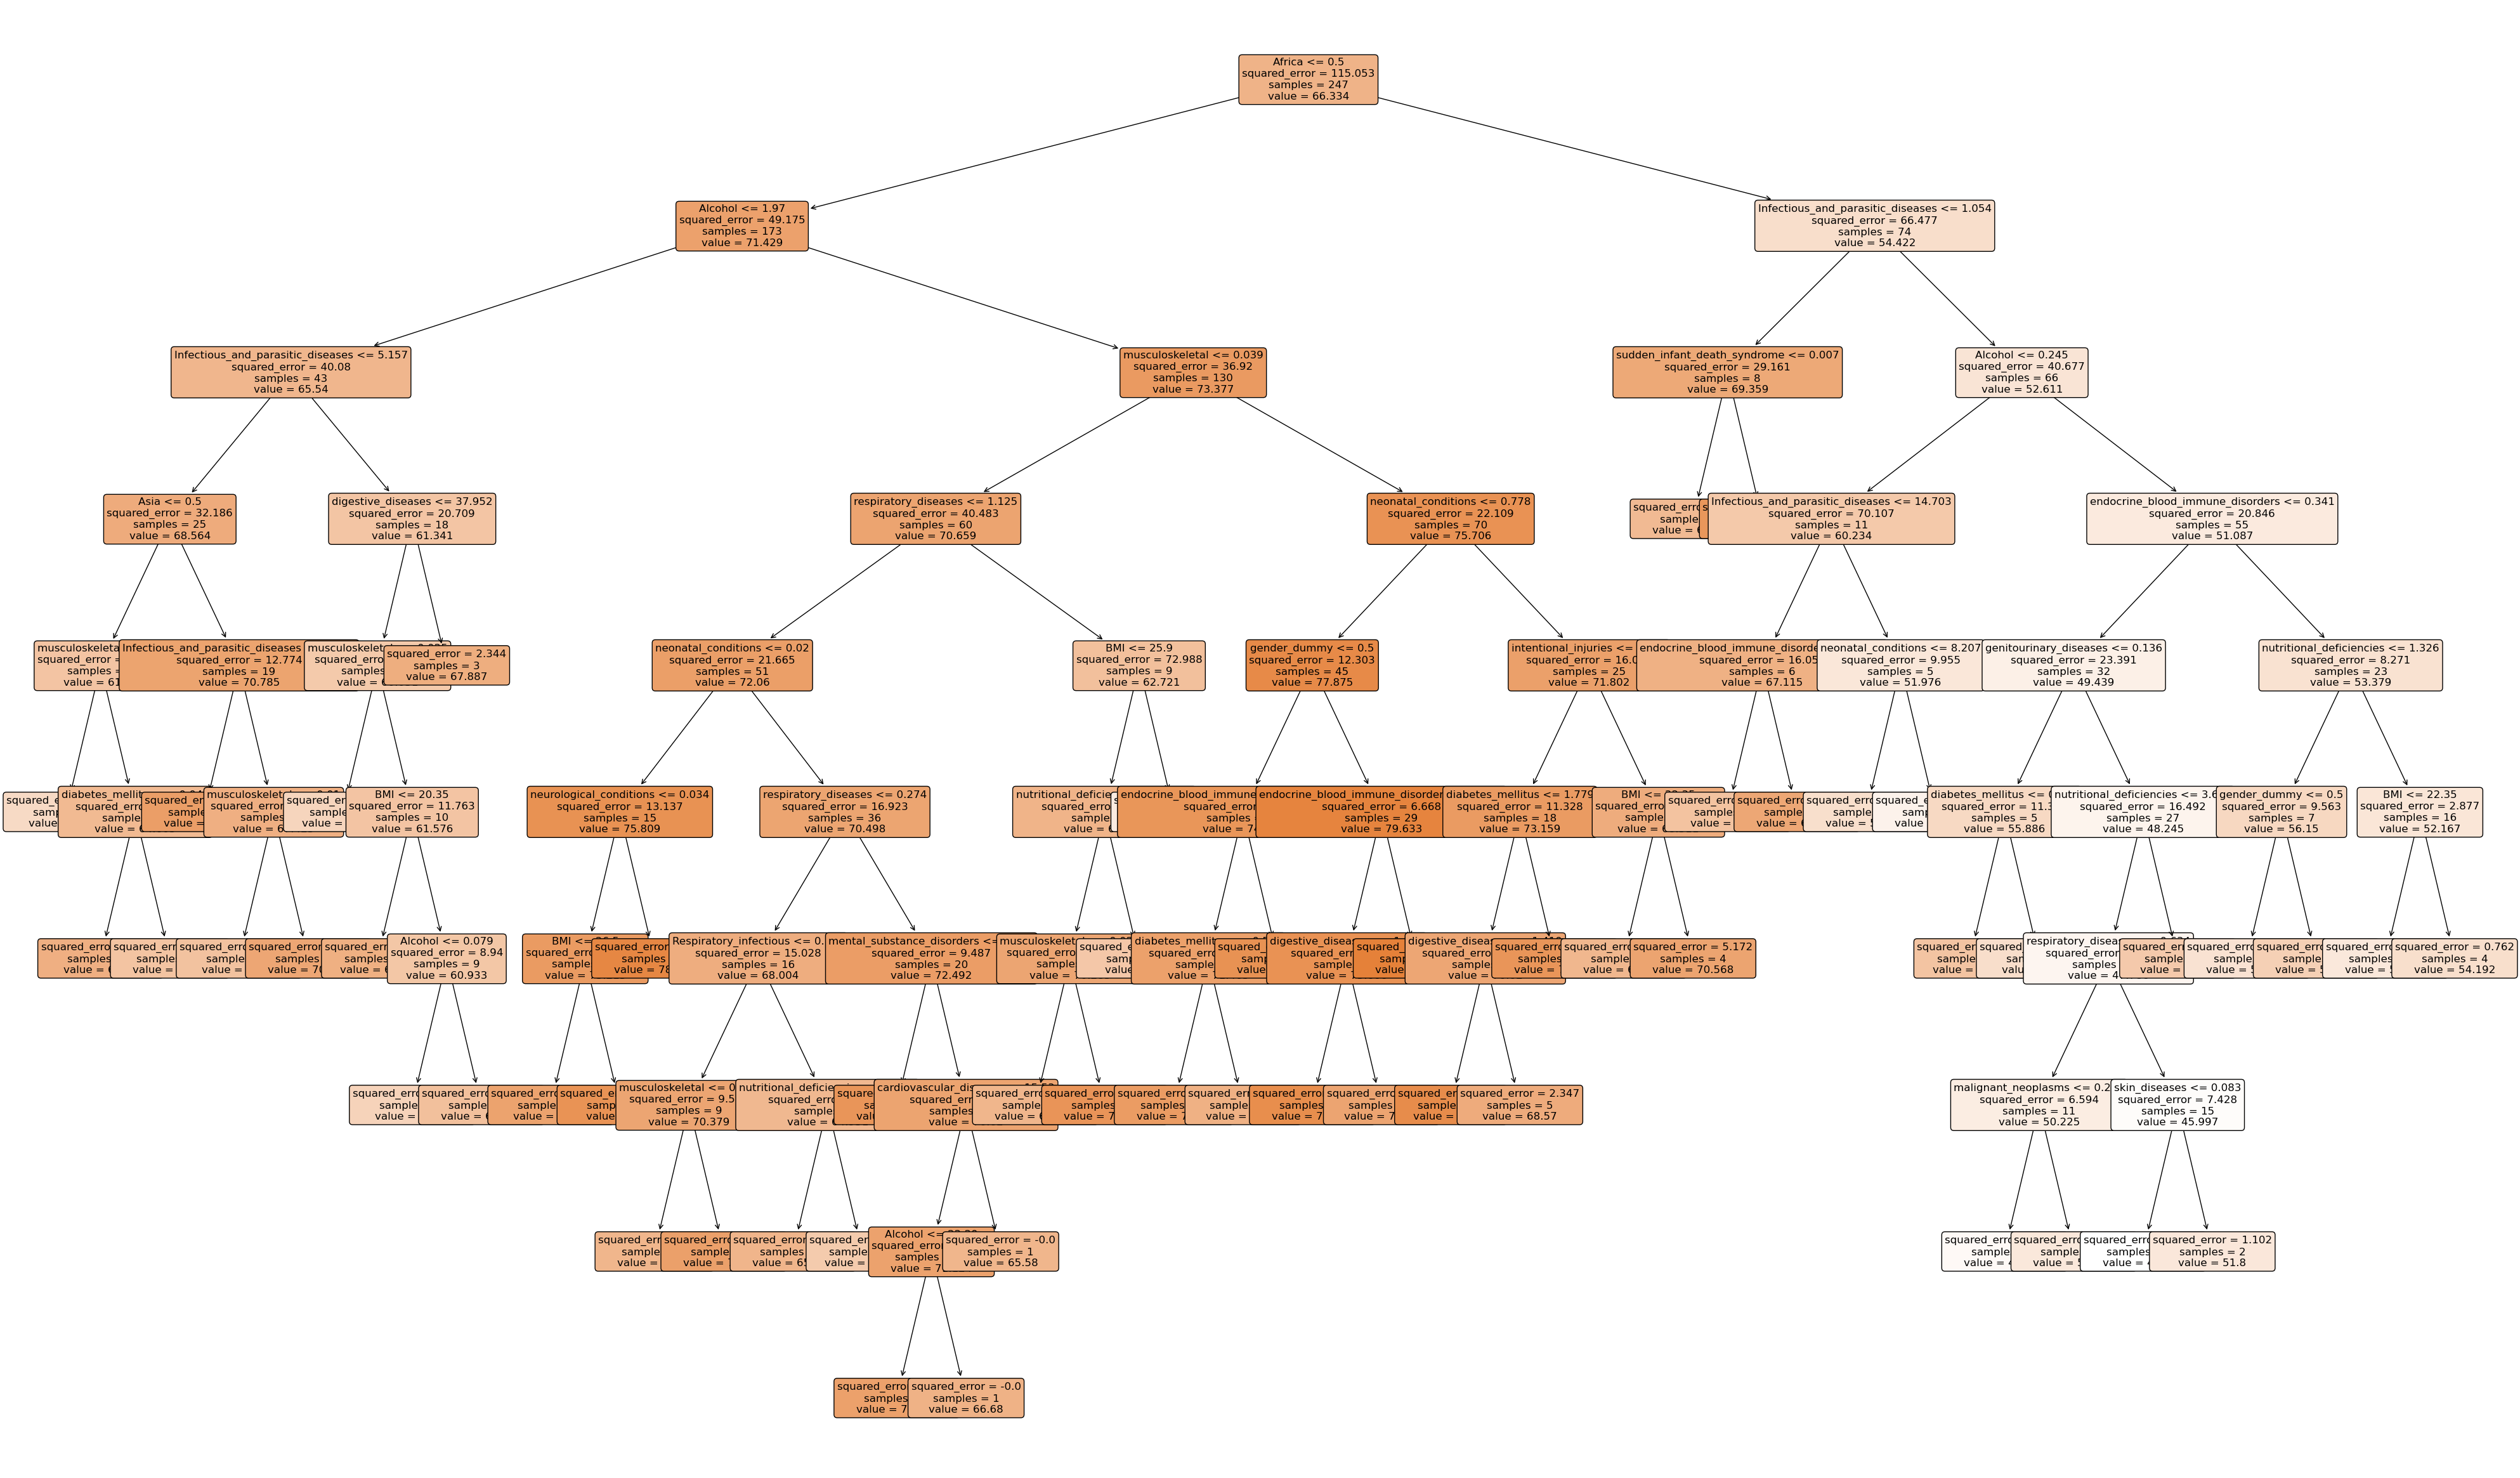

In [120]:
print('Node count =', dtr_cv_acc.best_estimator_.tree_.node_count) #looking at node count of dtr_cv_acc

plt.figure(figsize=(50,30))
plot_tree(dtr_cv_acc.best_estimator_, 
          feature_names=X_train2000.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12)
          #max_depth=3)
plt.show()

In [121]:
def tree_OSR2(model, X_test, y_test, y_train): #helper function to calculate OSR2
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [122]:
def mae(model, X_test, y_test, y_train): #helper function to calculate MAE
    
    y_pred = model.predict(X_test)
    abs_diff = np.abs(y_test - y_pred)
                 
    return np.sum(abs_diff)/len(y_test)

In [123]:
# Calculating the mean absolute error 
mae_test = mae(dtr_cv_acc.best_estimator_, X_test2000, y_test2000, y_train2000)
print('Reg Tree OSR2:', tree_OSR2(dtr_cv_acc.best_estimator_, X_test2000, y_test2000, y_train2000))
print(f"Mean absolute error on test set: {mae_test}")

Reg Tree OSR2: 0.37521062257925053
Mean absolute error on test set: 5.073643113895449


In [124]:
e_dtr = DecisionTreeRegressor(max_leaf_nodes = 8)
e_dtr.fit(X_train2000, y_train2000)

DecisionTreeRegressor(max_leaf_nodes=8)

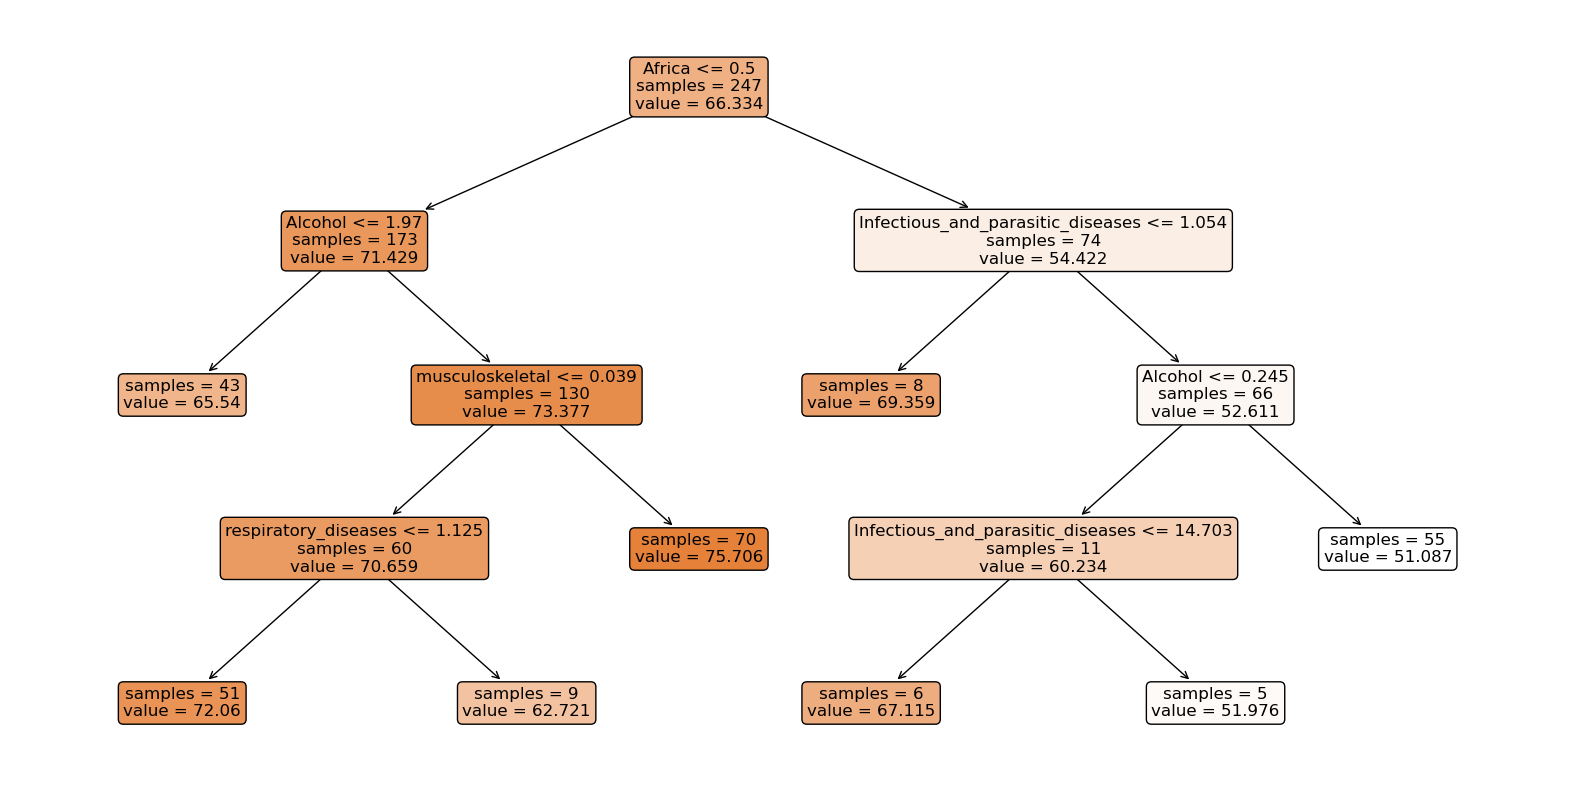

In [125]:
plt.figure(figsize=(20,10))
plot_tree(e_dtr, 
          feature_names=X_train2000.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [126]:
# Extracting the importances by sklearn 
importances_sk = dtr_cv_acc.best_estimator_.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(X_train2000.columns):
    feature_importance_sk[feature] = importances_sk[i]

print(f"Feature importance by sklearn: {feature_importance_sk}")

Feature importance by sklearn: {'BMI': 0.018898974232546047, 'Alcohol': 0.10199178599860866, 'gender_dummy': 0.01074975299654713, 'Africa': 0.5401088401747541, 'Asia': 0.014072654483753212, 'Europe': 0.0, 'North America': 0.0, 'Oceania': 0.0, 'South America': 0.0, 'Infectious_and_parasitic_diseases': 0.11786123606979082, 'Respiratory_infectious': 0.004178760869297458, 'neonatal_conditions': 0.033434373220399216, 'nutritional_deficiencies': 0.014898065098223341, 'endocrine_blood_immune_disorders': 0.015851159520696337, 'cardiovascular_disease': 0.001006670627123023, 'respiratory_diseases': 0.03457260855408111, 'digestive_diseases': 0.008990575943101682, 'genitourinary_diseases': 0.008874397527236904, 'malignant_neoplasms': 0.001759869560639445, 'neurological_conditions': 0.004154752578447224, 'unintentional_injuries': 0.0, 'intentional_injuries': 0.00426670582043177, 'mental_substance_disorders': 0.003087859013289396, 'sense_organ': 0.0, 'musculoskeletal': 0.04444619493106724, 'congenit

In [127]:
feature_importance_sk_df = pd.DataFrame.from_dict(feature_importance_sk, orient='index')
feature_importance_sk_df['Validation Tree'] = feature_importance_sk_df[0]
feature_importance_sk_df = feature_importance_sk_df.drop([0], axis=1)
feature_importance_sk_df.sort_values(by=feature_importance_sk_df.columns.tolist(), ascending=False)

Validation Tree
Africa                                    0.540109
Infectious_and_parasitic_diseases         0.117861
Alcohol                                   0.101992
musculoskeletal                           0.044446
respiratory_diseases                      0.034573
neonatal_conditions                       0.033434
BMI                                       0.018899
endocrine_blood_immune_disorders          0.015851
nutritional_deficiencies                  0.014898
Asia                                      0.014073
gender_dummy                              0.010750
digestive_diseases                        0.008991
genitourinary_diseases                    0.008874
sudden_infant_death_syndrome              0.007187
diabetes_mellitus                         0.006808
intentional_injuries                      0.004267
Respiratory_infectious                    0.004179
neurological_conditions                   0.004155
mental_substance_disorders                0.003088
skin_diseases                             0.002799
malignant_neoplasms                       0.001760
cardiovascular_disease                    0.001007
congenital                                0.000000
Oceania                                   0.000000
sense_organ                               0.000000
unintentional_injuries                    0.000000
South America                             0.000000
Europe                                    0.000000
North America                             0.000000
oral_conditions                           0.000000

In [128]:
# Extracting the importances by sklearn 
importances_shallow = e_dtr.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_shallow = {}
for i, feature in enumerate(X_train2000.columns):
    feature_importance_shallow[feature] = importances_shallow[i]

print(f"Feature importance by sklearn (shallow tree): {feature_importance_shallow}")

Feature importance by sklearn (shallow tree): {'BMI': 0.0, 'Alcohol': 0.1258605302649063, 'gender_dummy': 0.0, 'Africa': 0.6858224735386607, 'Asia': 0.0, 'Europe': 0.0, 'North America': 0.0, 'Oceania': 0.0, 'South America': 0.0, 'Infectious_and_parasitic_diseases': 0.1201485311593145, 'Respiratory_infectious': 0.0, 'neonatal_conditions': 0.0, 'nutritional_deficiencies': 0.0, 'endocrine_blood_immune_disorders': 0.0, 'cardiovascular_disease': 0.0, 'respiratory_diseases': 0.03052092420086695, 'digestive_diseases': 0.0, 'genitourinary_diseases': 0.0, 'malignant_neoplasms': 0.0, 'neurological_conditions': 0.0, 'unintentional_injuries': 0.0, 'intentional_injuries': 0.0, 'mental_substance_disorders': 0.0, 'sense_organ': 0.0, 'musculoskeletal': 0.037647540836251554, 'congenital': 0.0, 'sudden_infant_death_syndrome': 0.0, 'skin_diseases': 0.0, 'diabetes_mellitus': 0.0, 'oral_conditions': 0.0}


In [129]:
feature_importance_shallow_df = pd.DataFrame.from_dict(feature_importance_shallow, orient='index')
feature_importance_shallow_df['Shallow Tree'] = feature_importance_shallow_df[0]
feature_importance_shallow_df = feature_importance_shallow_df.drop([0], axis=1)
feature_importance_shallow_df.sort_values(by=feature_importance_shallow_df.columns.tolist(), ascending=False)

Shallow Tree
Africa                                 0.685822
Alcohol                                0.125861
Infectious_and_parasitic_diseases      0.120149
musculoskeletal                        0.037648
respiratory_diseases                   0.030521
genitourinary_diseases                 0.000000
diabetes_mellitus                      0.000000
skin_diseases                          0.000000
sudden_infant_death_syndrome           0.000000
congenital                             0.000000
sense_organ                            0.000000
mental_substance_disorders             0.000000
intentional_injuries                   0.000000
unintentional_injuries                 0.000000
neurological_conditions                0.000000
malignant_neoplasms                    0.000000
BMI                                    0.000000
digestive_diseases                     0.000000
cardiovascular_disease                 0.000000
endocrine_blood_immune_disorders       0.000000
nutritional_deficiencies               0.000000
neonatal_conditions                    0.000000
Respiratory_infectious                 0.000000
South America                          0.000000
Oceania                                0.000000
North America                          0.000000
Europe                                 0.000000
Asia                                   0.000000
gender_dummy                           0.000000
oral_conditions                        0.000000

In [130]:
combined_df = feature_importance_sk_df.join(feature_importance_shallow_df)
combined_df.sort_values(by=['Validation Tree'], ascending=False)

Validation Tree  Shallow Tree
Africa                                    0.540109      0.685822
Infectious_and_parasitic_diseases         0.117861      0.120149
Alcohol                                   0.101992      0.125861
musculoskeletal                           0.044446      0.037648
respiratory_diseases                      0.034573      0.030521
neonatal_conditions                       0.033434      0.000000
BMI                                       0.018899      0.000000
endocrine_blood_immune_disorders          0.015851      0.000000
nutritional_deficiencies                  0.014898      0.000000
Asia                                      0.014073      0.000000
gender_dummy                              0.010750      0.000000
digestive_diseases                        0.008991      0.000000
genitourinary_diseases                    0.008874      0.000000
sudden_infant_death_syndrome              0.007187      0.000000
diabetes_mellitus                         0.006808      0.000000
intentional_injuries                      0.004267      0.000000
Respiratory_infectious                    0.004179      0.000000
neurological_conditions                   0.004155      0.000000
mental_substance_disorders                0.003088      0.000000
skin_diseases                             0.002799      0.000000
malignant_neoplasms                       0.001760      0.000000
cardiovascular_disease                    0.001007      0.000000
congenital                                0.000000      0.000000
Oceania                                   0.000000      0.000000
sense_organ                               0.000000      0.000000
unintentional_injuries                    0.000000      0.000000
South America                             0.000000      0.000000
Europe                                    0.000000      0.000000
North America                             0.000000      0.000000
oral_conditions                           0.000000      0.000000

In [131]:
def importance_plot(tree, X_train):
    
    feature_importance = tree.feature_importances_ # get the importance of each feature
    
    #relative feature importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    
    # Save to a dataframe with two columns: One holding the names of the features, 
    # and one holding the associated relative importance of each feature.
    feat_df = pd.DataFrame({'feature':X_train.columns, 'importance':feature_importance})
    # Sort feat_df in order of importance
    feat_df = feat_df.sort_values(by='importance', ascending=True)
    
    # Bar plot 
    plt.figure(figsize=(8, 7.5))
    plt.barh(width=feat_df.importance, y=feat_df.feature)
    plt.xlabel('Relative feature importance');

In [132]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train2000, y_train2000)

RandomForestRegressor()

In [133]:
y_pred_rf = rf.predict(X_test2000)
print('OSR2:', tree_OSR2(rf, X_test2000, y_test2000, y_train2000))

OSR2: 0.6767693283452376


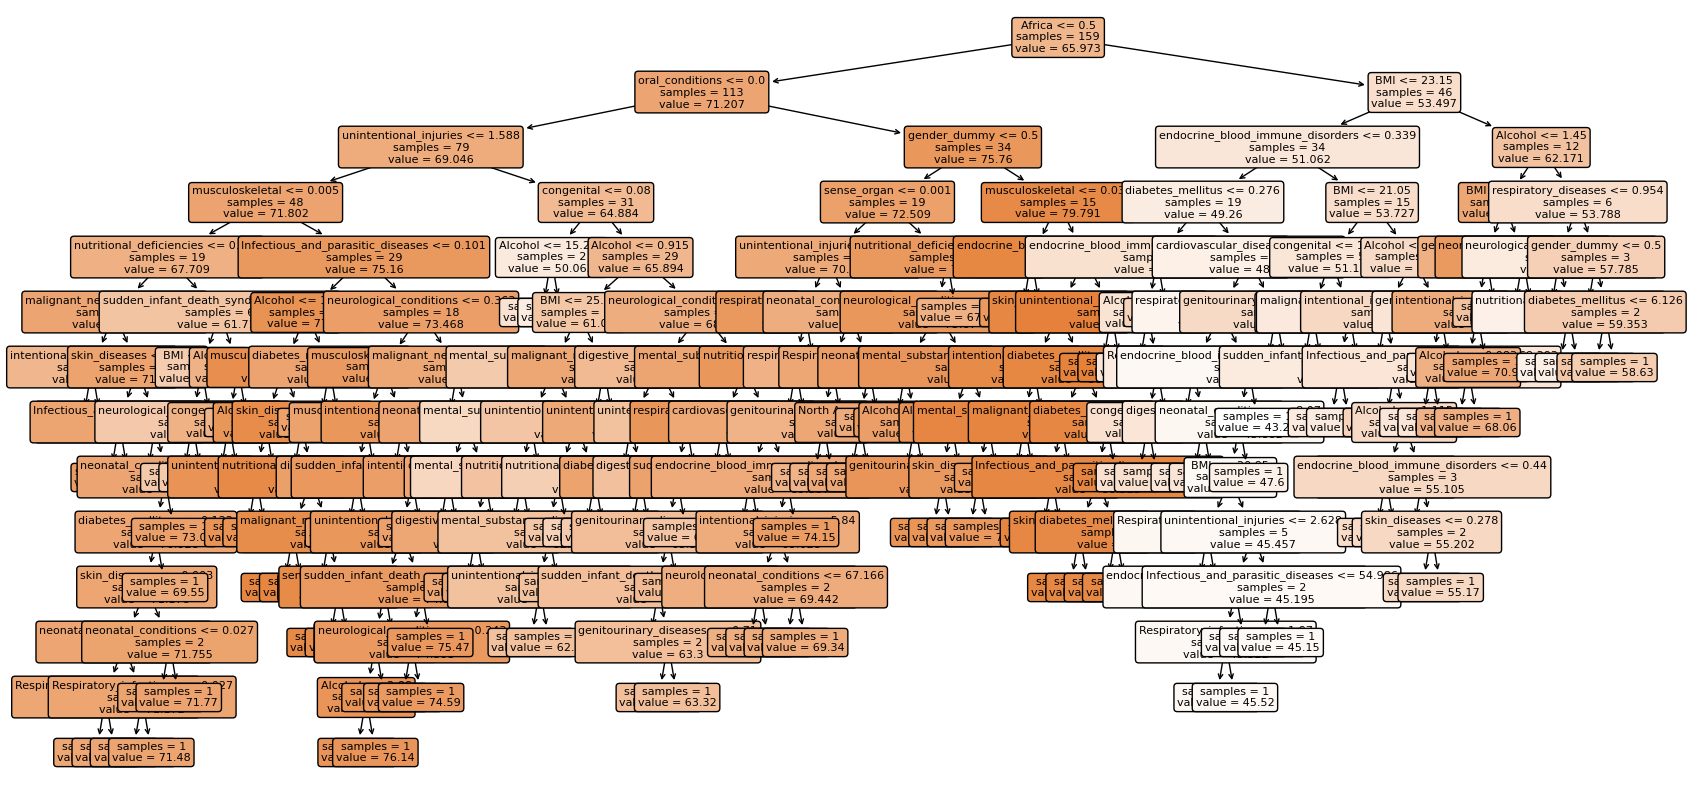

In [134]:
from sklearn.tree import export_graphviz


plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], 
          feature_names=X_train2000.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=8)
plt.show()

In [135]:
features_rf = rf.feature_names_in_
importance_rf = rf.feature_importances_

In [136]:
for x, y in zip(features_rf, importance_rf):
  print(x, y)

BMI 0.15602220247299142
Alcohol 0.07024740164970082
gender_dummy 0.009903148501645564
Africa 0.42753436173748915
Asia 0.012000145431061014
Europe 0.0017319326690173919
North America 0.00018064163172052473
Oceania 0.0008887189607129676
South America 0.0005859738042962195
Infectious_and_parasitic_diseases 0.08911100856815649
Respiratory_infectious 0.004794385381909445
neonatal_conditions 0.01877500769207792
nutritional_deficiencies 0.016134038667420924
endocrine_blood_immune_disorders 0.013835846660402794
cardiovascular_disease 0.012214775941329586
respiratory_diseases 0.008530704313879837
digestive_diseases 0.006471898284491743
genitourinary_diseases 0.005065430967567322
malignant_neoplasms 0.015054700955625517
neurological_conditions 0.00857450255818938
unintentional_injuries 0.007343450596237447
intentional_injuries 0.007709636144640725
mental_substance_disorders 0.006396111591741059
sense_organ 0.0012028102475685344
musculoskeletal 0.05806510327701863
congenital 0.008447144094492457


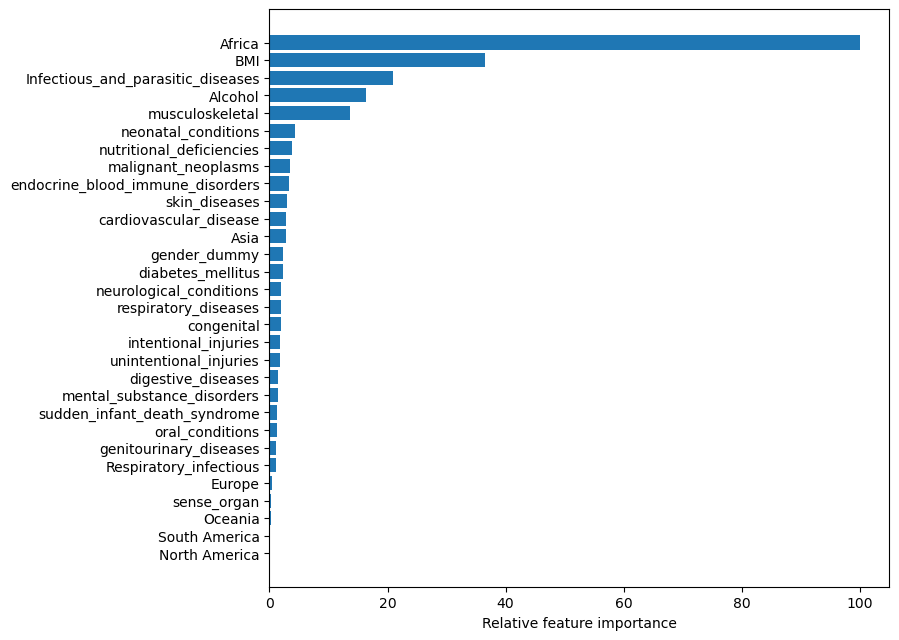

In [137]:
importance_plot(rf, X_train2000)

# OCEANIA ANALYSIS [REAL ANALYSIS] STARTS BELOW

In [138]:
oc_train = pd.read_csv('train_Oceania.csv')
oc_test = pd.read_csv('test_Oceania.csv')
oc_train

Life Expectancy at birth        BMI  Alcohol  gender_dummy  2000  2010  \
0                      61.30  25.100000     0.55             0     0     1   
1                      54.75  28.700000     1.00             0     0     1   
2                      63.69  25.100000     1.14             0     1     0   
3                      62.02  25.500000     0.65             0     0     0   
4                      56.14  28.633333     0.80             0     0     0   
5                      60.14  28.000000     0.81             0     0     0   
6                      61.37  31.000000     3.44             1     0     0   
7                      68.04  30.000000     0.60             0     1     0   
8                      77.13  26.600000    17.89             0     1     0   
9                      65.24  25.500000     1.97             1     1     0   
10                     71.49  33.900000     4.39             1     0     0   
11                     68.43  27.400000     5.42             1     1     0   
12                     74.20  32.500000     2.85             1     1     0   
13                     55.13  29.000000     0.70             0     0     0   
14                     69.52  28.300000     5.34             1     0     1   
15                     52.31  28.200000     0.98             0     1     0   
16                     65.77  26.500000     1.21             0     0     0   
17                     68.68  30.300000     0.89             0     0     0   
18                     70.08  28.700000     5.92             1     0     0   
19                     81.25  27.133333    15.72             0     0     0   
20                     83.99  26.500000     6.14             1     0     1   
21                     62.57  25.200000     0.82             0     0     0   
22                     84.17  26.700000     5.34             1     0     0   
23                     63.40  24.666667     0.72             0     0     0   
24                     65.86  26.000000     1.10             0     0     1   
25                     66.46  29.000000     1.34             0     1     0   
26                     79.73  28.100000    16.08             0     0     0   
27                     65.66  31.300000     3.97             1     0     0   
28                     58.45  27.400000     1.33             0     1     0   
29                     61.39  30.500000     4.87             1     0     1   
30                     83.52  27.300000     5.23             1     0     0   
31                     76.00  26.800000    15.90             0     1     0   
32                     68.08  29.900000     0.97             0     0     1   
33                     60.01  27.800000     0.95             0     0     1   
34                     82.85  27.900000     5.09             1     0     0   
35                     67.36  25.133333     3.49             1     0     0   
36                     82.24  25.900000     5.74             1     1     0   
37                     69.16  29.733333     0.93             0     0     0   
38                     66.40  26.400000     2.63             1     0     1   
39                     62.87  25.000000     0.59             0     0     0   
40                     61.90  25.400000     0.62             0     0     1   
41                     81.06  26.500000     4.91             1     1     0   
42                     80.41  27.500000    16.45             0     0     0   
43                     75.54  33.700000     0.64             1     0     0   
44                     70.78  32.000000     6.55             1     1     0   
45                     71.85  33.066667     4.58             1     0     0   
46                     69.14  30.300000     0.49             0     0     1   
47                     79.12  27.800000    17.47             0     0     1   
48                     66.05  30.766667     4.14             1     0     0   
49                     61.12  24.000000     0.55             0     1     0   
50                     80.

In [139]:
y_trainoc = oc_train['Life Expectancy at birth']
X_trainoc = oc_train.drop(['Life Expectancy at birth'], axis=1)
y_testoc = oc_test['Life Expectancy at birth']
X_testoc = oc_test.drop(['Life Expectancy at birth'], axis=1)
X_trainoc

BMI  Alcohol  gender_dummy  2000  2010  2015  2019  \
0   25.100000     0.55             0     0     1     0     0   
1   28.700000     1.00             0     0     1     0     0   
2   25.100000     1.14             0     1     0     0     0   
3   25.500000     0.65             0     0     0     1     0   
4   28.633333     0.80             0     0     0     0     1   
5   28.000000     0.81             0     0     0     1     0   
6   31.000000     3.44             1     0     0     1     0   
7   30.000000     0.60             0     1     0     0     0   
8   26.600000    17.89             0     1     0     0     0   
9   25.500000     1.97             1     1     0     0     0   
10  33.900000     4.39             1     0     0     1     0   
11  27.400000     5.42             1     1     0     0     0   
12  32.500000     2.85             1     1     0     0     0   
13  29.000000     0.70             0     0     0     1     0   
14  28.300000     5.34             1     0     1     0     0   
15  28.200000     0.98             0     1     0     0     0   
16  26.500000     1.21             0     0     0     1     0   
17  30.300000     0.89             0     0     0     1     0   
18  28.700000     5.92             1     0     0     1     0   
19  27.133333    15.72             0     0     0     0     1   
20  26.500000     6.14             1     0     1     0     0   
21  25.200000     0.82             0     0     0     1     0   
22  26.700000     5.34             1     0     0     1     0   
23  24.666667     0.72             0     0     0     0     1   
24  26.000000     1.10             0     0     1     0     0   
25  29.000000     1.34             0     1     0     0     0   
26  28.100000    16.08             0     0     0     1     0   
27  31.300000     3.97             1     0     0     1     0   
28  27.400000     1.33             0     1     0     0     0   
29  30.500000     4.87             1     0     1     0     0   
30  27.300000     5.23             1     0     0     0     1   
31  26.800000    15.90             0     1     0     0     0   
32  29.900000     0.97             0     0     1     0     0   
33  27.800000     0.95             0     0     1     0     0   
34  27.900000     5.09             1     0     0     1     0   
35  25.133333     3.49             1     0     0     0     1   
36  25.900000     5.74             1     1     0     0     0   
37  29.733333     0.93             0     0     0     0     1   
38  26.400000     2.63             1     0     1     0     0   
39  25.000000     0.59             0     0     0     0     1   
40  25.400000     0.62             0     0     1     0     0   
41  26.500000     4.91             1     1     0     0     0   
42  27.500000    16.45             0     0     0     1     0   
43  33.700000     0.64             1     0     0     1     0   
44  32.000000     6.55             1     1     0     0     0   
45  33.066667     4.58             1     0     0     0     1   
46  30.300000     0.49             0     0     1     0     0   
47  27.800000    17.47             0     0     1     0     0   
48  30.766667     4.14             1     0     0     0     1   
49  24.000000     0.55             0     1     0     0     0   
50  27.566667    16.46             0     0     0     0     1   
51  26.333333     3.48             1     0     0     0     1   
52  24.200000     2.69             1     1     0     0     0   
53  26.266667     2.87             1     0     0     0     1   
54  30.233333     3.97             1     0     0     0     1   
55  30.500000     0.13             0     0     0     1     0   

    Infectious_and_parasitic_diseases  Respiratory_infectious  \
0                            0.242223                0.207072   
1                            0.068839                0.033760   
2                            0.126789                0.135318   
3                            0.066387                0.067754   
4                            0.06395

## RANDOM FOREST OCEANIA BELOW

In [140]:
oc_rf = RandomForestRegressor(random_state=88)
oc_rf.fit(X_trainoc, y_trainoc)

RandomForestRegressor(random_state=88)

In [141]:
# Calculating the mean absolute error 
print('Reg Tree OSR2:', tree_OSR2(oc_rf, X_testoc, y_testoc, y_trainoc))
print(f"Mean absolute error on test set: {mae(oc_rf, X_testoc, y_testoc, y_trainoc)}")

Reg Tree OSR2: 0.9123747699228582
Mean absolute error on test set: 1.5270416666666644


In [142]:
features_rfoc = oc_rf.feature_names_in_
importance_rfoc = oc_rf.feature_importances_

In [143]:
for x, y in zip(features_rfoc, importance_rfoc):
  print(x, y)

BMI 0.025862799267592614
Alcohol 0.03319887327801154
gender_dummy 0.007696485308850617
2000 0.0013674603041839918
2010 0.00015476301452610068
2015 0.00035041010333628744
2019 0.0008041403561815758
Infectious_and_parasitic_diseases 0.0694140319446249
Respiratory_infectious 0.003252316504305933
neonatal_conditions 0.015394065576968666
nutritional_deficiencies 0.008162121822771868
endocrine_blood_immune_disorders 0.27968773484163467
cardiovascular_disease 0.008496852694747646
respiratory_diseases 0.0029234395292989236
digestive_diseases 0.0052351075787465335
genitourinary_diseases 0.024407979347444327
malignant_neoplasms 0.15184003089650547
neurological_conditions 0.2029719890139204
unintentional_injuries 0.005784055113363751
intentional_injuries 0.008824983049971057
mental_substance_disorders 0.025048350963321534
sense_organ 0.001002341473123077
musculoskeletal 0.108055734330457
congenital 0.002521933837731239
sudden_infant_death_syndrome 0.002775953741055218
skin_diseases 0.002503566354

Text(0.5, 1.0, 'Oceania')

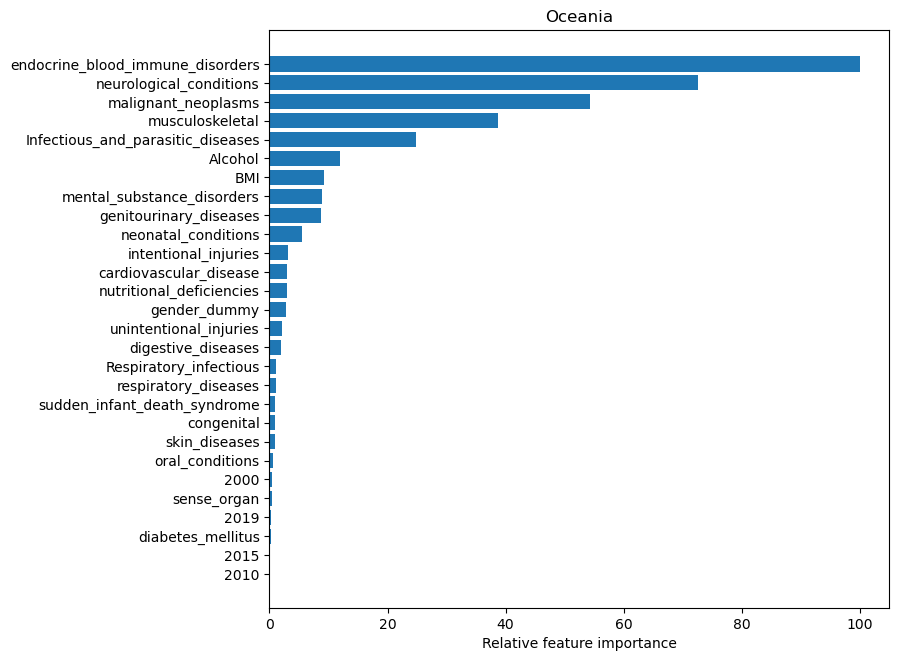

In [144]:
importance_plot(oc_rf, X_trainoc)
plt.title('Oceania')

# LINEAR OCEANIA BELOW

In [145]:
X_trainoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BMI                                56 non-null     float64
 1   Alcohol                            56 non-null     float64
 2   gender_dummy                       56 non-null     int64  
 3   2000                               56 non-null     int64  
 4   2010                               56 non-null     int64  
 5   2015                               56 non-null     int64  
 6   2019                               56 non-null     int64  
 7   Infectious_and_parasitic_diseases  56 non-null     float64
 8   Respiratory_infectious             56 non-null     float64
 9   neonatal_conditions                56 non-null     float64
 10  nutritional_deficiencies           56 non-null     float64
 11  endocrine_blood_immune_disorders   56 non-null     float64
 

In [146]:
y_col = 'Life Expectancy at birth'
X_coloc = X_trainoc.columns.values.tolist()

In [147]:
def add_Q(temp_list):
    temp = temp_list.copy()
    for x in np.arange(len(temp_list)):
        temp[x] = ('Q("' +temp_list[x]+'")')
    return temp

add_Q(X_coloc)

['Q("BMI")',
 'Q("Alcohol")',
 'Q("gender_dummy")',
 'Q("2000")',
 'Q("2010")',
 'Q("2015")',
 'Q("2019")',
 'Q("Infectious_and_parasitic_diseases")',
 'Q("Respiratory_infectious")',
 'Q("neonatal_conditions")',
 'Q("nutritional_deficiencies")',
 'Q("endocrine_blood_immune_disorders")',
 'Q("cardiovascular_disease")',
 'Q("respiratory_diseases")',
 'Q("digestive_diseases")',
 'Q("genitourinary_diseases")',
 'Q("malignant_neoplasms")',
 'Q("neurological_conditions")',
 'Q("unintentional_injuries")',
 'Q("intentional_injuries")',
 'Q("mental_substance_disorders")',
 'Q("sense_organ")',
 'Q("musculoskeletal")',
 'Q("congenital")',
 'Q("sudden_infant_death_syndrome")',
 'Q("skin_diseases")',
 'Q("diabetes_mellitus")',
 'Q("oral_conditions")']

In [148]:
model1 = smf.ols(formula= 'Q("'+ y_col +'")'+ ' ~ ' + ' + '.join(add_Q(X_coloc)),
                 data=oc_train).fit()
print(model1.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Q("Life Expectancy at birth")   R-squared:                       0.953
Model:                                       OLS   Adj. R-squared:                  0.909
Method:                            Least Squares   F-statistic:                     21.25
Date:                           Sat, 06 May 2023   Prob (F-statistic):           1.79e-12
Time:                                   11:48:02   Log-Likelihood:                -111.01
No. Observations:                             56   AIC:                             278.0
Df Residuals:                                 28   BIC:                             334.7
Df Model:                                     27                                         
Covariance Type:                       nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      

In [149]:
X_VIFoc = pd.DataFrame(VIF(oc_train, X_coloc))
X_VIFoc

/Users/shannonzhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/shannonzhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


0
BMI                                6.606718e+00
Alcohol                            3.854397e+01
gender_dummy                       9.928825e+00
2000                                        inf
2010                                        inf
2015                                        inf
2019                                        inf
Infectious_and_parasitic_diseases  4.765042e+03
Respiratory_infectious             5.345878e+02
neonatal_conditions                4.725347e+03
nutritional_deficiencies           6.297267e+02
endocrine_blood_immune_disorders   1.043247e+04
cardiovascular_disease             3.118682e+03
respiratory_diseases               9.925296e+02
digestive_diseases                 1.174598e+03
genitourinary_diseases             4.380213e+03
malignant_neoplasms                3.580409e+03
neurological_conditions            2.347046e+03
unintentional_injuries             1.439042e+03
intentional_injuries               2.172390e+03
mental_substance_disorders         1.848136e+03
sense_organ                        4.702446e+02
musculoskeletal                    2.380254e+03
congenital                         3.647078e+03
sudden_infant_death_syndrome       3.844899e+02
skin_diseases                      1.710785e+03
diabetes_mellitus                  1.525061e+02
oral_conditions                    1.761886e+02

In [150]:
from tabulate import tabulate 

print(tabulate(X_VIFoc, showindex=True, headers='keys', tablefmt='psql'))

+-----------------------------------+-------------+
|                                   |           0 |
|-----------------------------------+-------------|
| BMI                               |     6.60672 |
| Alcohol                           |    38.544   |
| gender_dummy                      |     9.92883 |
| 2000                              |   inf       |
| 2010                              |   inf       |
| 2015                              |   inf       |
| 2019                              |   inf       |
| Infectious_and_parasitic_diseases |  4765.04    |
| Respiratory_infectious            |   534.588   |
| neonatal_conditions               |  4725.35    |
| nutritional_deficiencies          |   629.727   |
| endocrine_blood_immune_disorders  | 10432.5     |
| cardiovascular_disease            |  3118.68    |
| respiratory_diseases              |   992.53    |
| digestive_diseases                |  1174.6     |
| genitourinary_diseases            |  4380.21    |
| malignant_

In [151]:
x_coloc1 = X_coloc.copy()
x_coloc1.remove('Infectious_and_parasitic_diseases')
x_coloc1

['BMI',
 'Alcohol',
 'gender_dummy',
 '2000',
 '2010',
 '2015',
 '2019',
 'Respiratory_infectious',
 'neonatal_conditions',
 'nutritional_deficiencies',
 'endocrine_blood_immune_disorders',
 'cardiovascular_disease',
 'respiratory_diseases',
 'digestive_diseases',
 'genitourinary_diseases',
 'malignant_neoplasms',
 'neurological_conditions',
 'unintentional_injuries',
 'intentional_injuries',
 'mental_substance_disorders',
 'sense_organ',
 'musculoskeletal',
 'congenital',
 'sudden_infant_death_syndrome',
 'skin_diseases',
 'diabetes_mellitus',
 'oral_conditions']

In [152]:
model2 = smf.ols(formula= 'Q("'+ y_col +'")'+ ' ~ ' + ' + '.join(add_Q(x_coloc1)),
                 data=oc_train).fit()
print(model2.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Q("Life Expectancy at birth")   R-squared:                       0.953
Model:                                       OLS   Adj. R-squared:                  0.910
Method:                            Least Squares   F-statistic:                     22.51
Date:                           Sat, 06 May 2023   Prob (F-statistic):           4.50e-13
Time:                                   11:48:02   Log-Likelihood:                -111.42
No. Observations:                             56   AIC:                             276.8
Df Residuals:                                 29   BIC:                             331.5
Df Model:                                     26                                         
Covariance Type:                       nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0

In [153]:
print(tabulate(pd.DataFrame(VIF(oc_train, x_coloc1)), showindex=True, headers='keys', tablefmt='psql'))

+----------------------------------+------------+
|                                  |          0 |
|----------------------------------+------------|
| BMI                              |    5.5794  |
| Alcohol                          |   31.3961  |
| gender_dummy                     |    7.48375 |
| 2000                             |  inf       |
| 2010                             |  inf       |
| 2015                             |  inf       |
| 2019                             |  inf       |
| Respiratory_infectious           |  333.737   |
| neonatal_conditions              |  935.637   |
| nutritional_deficiencies         |  613.836   |
| endocrine_blood_immune_disorders | 6340.01    |
| cardiovascular_disease           | 1829.71    |
| respiratory_diseases             |  866.914   |
| digestive_diseases               | 1138.81    |
| genitourinary_diseases           | 4249.48    |
| malignant_neoplasms              | 2343.25    |
| neurological_conditions          | 2089.34    |


/Users/shannonzhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/shannonzhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [154]:
y_pred_oc = model1.predict(oc_test)
print('OSR2:', tree_OSR2(model1, X_testoc, y_testoc, y_trainoc))

OSR2: -3.7903320912658023


## CART REGRESSION TREE OCEANIA MODEL

In [155]:
dtroc = DecisionTreeRegressor(random_state=88)
dtroc_cv_acc = GridSearchCV(dtroc, param_grid = grid_values, scoring = 'r2', cv=cv, verbose=0) # default scoring metric to optimize is accuracy, used as default if none given.
dtroc_cv_acc.fit(X_trainoc, y_trainoc)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=88),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.01...
       0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755,
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ])},
             scoring

In [156]:
# Calculating the mean absolute error 
mae_test = mae(dtroc_cv_acc.best_estimator_, X_testoc, y_testoc, y_trainoc)
print('Reg Tree OSR2:', tree_OSR2(dtroc_cv_acc.best_estimator_, X_testoc, y_testoc, y_trainoc))
print(f"Mean absolute error on test set: {mae_test}")

Reg Tree OSR2: 0.8783931873410555
Mean absolute error on test set: 1.5046875000000013


Node count = 55


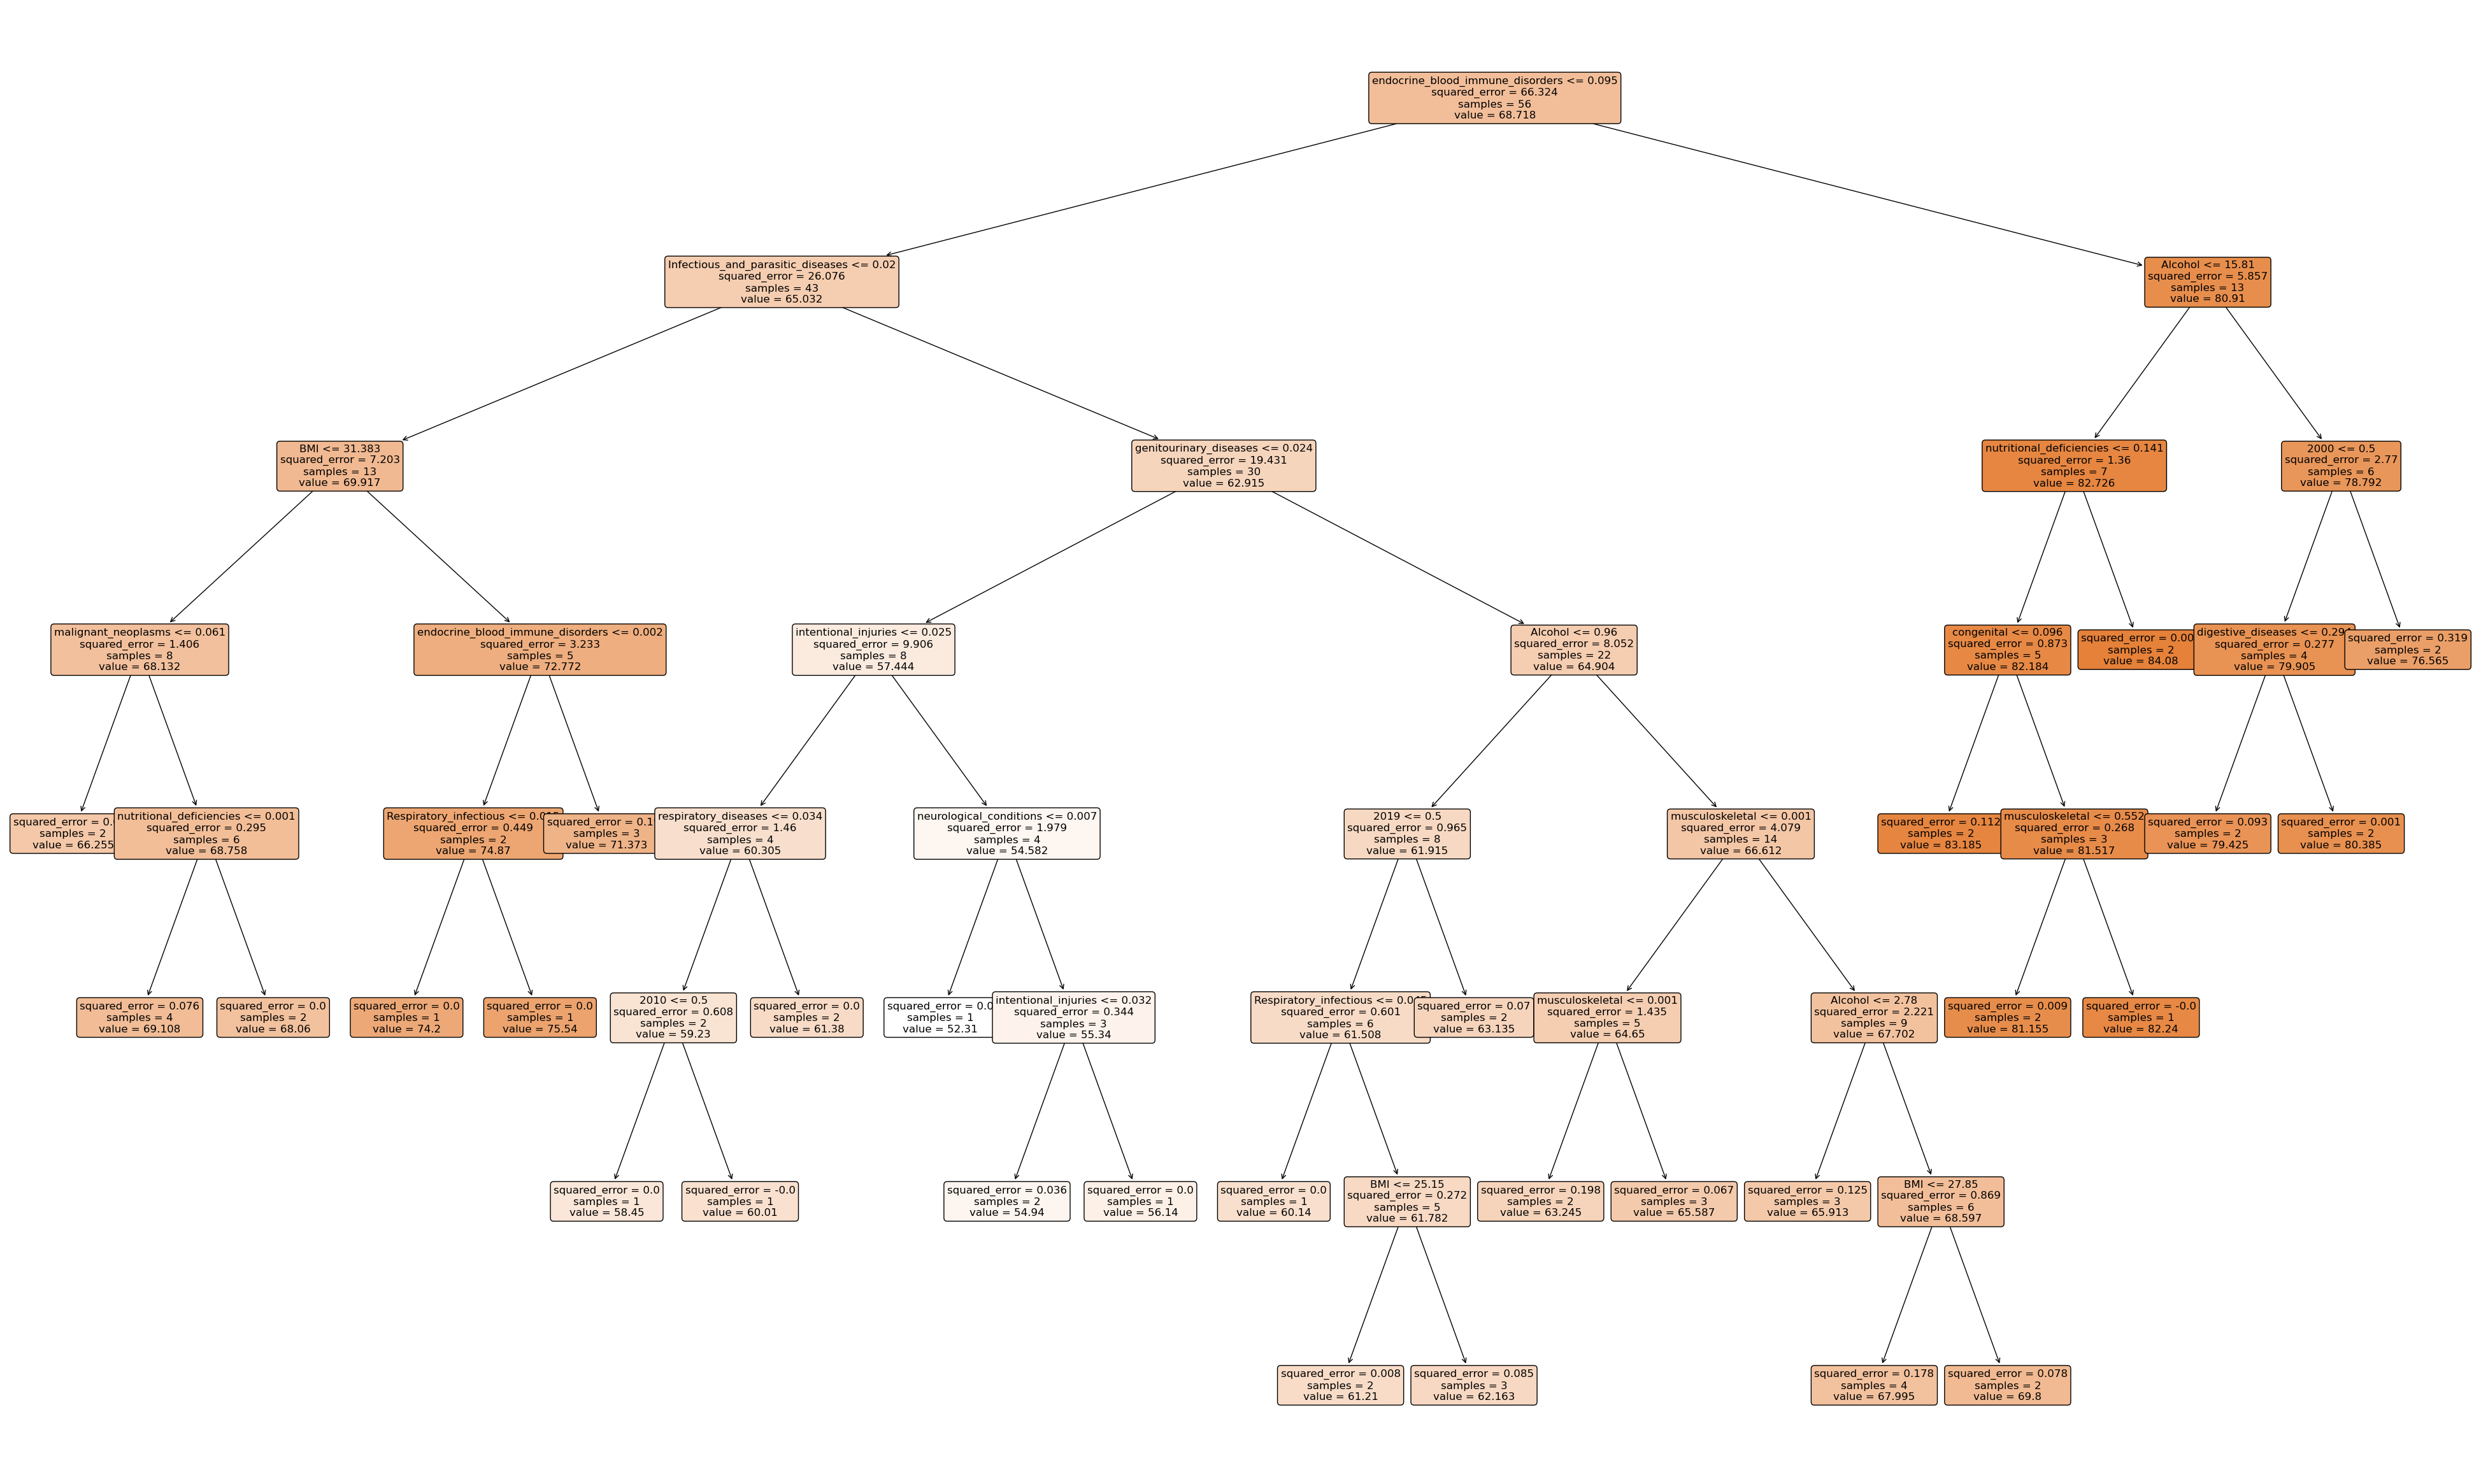

In [157]:
print('Node count =', dtroc_cv_acc.best_estimator_.tree_.node_count) #looking at node count of dtr_cv_acc

plt.figure(figsize=(50,30))
plot_tree(dtroc_cv_acc.best_estimator_, 
          feature_names=X_trainoc.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12)
          #max_depth=3)
plt.show()

In [158]:
# Extracting the importances by sklearn 
importances_oc = dtroc_cv_acc.best_estimator_.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_oc = {}
for i, feature in enumerate(X_trainoc.columns):
    feature_importance_oc[feature] = importances_oc[i]

print(f"Feature importance by sklearn: {feature_importance_oc}")

Feature importance by sklearn: {'BMI': 0.019318110414648364, 'Alcohol': 0.04763770090591292, 'gender_dummy': 0.0, '2000': 0.004009474261006981, '2010': 0.00032800084357571867, '2015': 0.0, '2019': 0.00106990237908853, 'Infectious_and_parasitic_diseases': 0.11987480968795551, 'Respiratory_infectious': 0.0008476598833374482, 'neonatal_conditions': 0.0, 'nutritional_deficiencies': 0.0017786820909073647, 'endocrine_blood_immune_disorders': 0.6823638183674092, 'cardiovascular_disease': 0.0, 'respiratory_diseases': 0.00124604199492848, 'digestive_diseases': 0.0002484266744236965, 'genitourinary_diseases': 0.0880165861390525, 'malignant_neoplasms': 0.0025338703125374635, 'neurological_conditions': 0.0018561038860844916, 'unintentional_injuries': 0.0, 'intentional_injuries': 0.01791335647517866, 'mental_substance_disorders': 0.0, 'sense_organ': 0.0, 'musculoskeletal': 0.010057123738784157, 'congenital': 0.0009003319451684192, 'sudden_infant_death_syndrome': 0.0, 'skin_diseases': 0.0, 'diabetes

In [159]:
feature_importance_oc_df = pd.DataFrame.from_dict(feature_importance_oc, orient='index')
feature_importance_oc_df

0
BMI                                0.019318
Alcohol                            0.047638
gender_dummy                       0.000000
2000                               0.004009
2010                               0.000328
2015                               0.000000
2019                               0.001070
Infectious_and_parasitic_diseases  0.119875
Respiratory_infectious             0.000848
neonatal_conditions                0.000000
nutritional_deficiencies           0.001779
endocrine_blood_immune_disorders   0.682364
cardiovascular_disease             0.000000
respiratory_diseases               0.001246
digestive_diseases                 0.000248
genitourinary_diseases             0.088017
malignant_neoplasms                0.002534
neurological_conditions            0.001856
unintentional_injuries             0.000000
intentional_injuries               0.017913
mental_substance_disorders         0.000000
sense_organ                        0.000000
musculoskeletal                    0.010057
congenital                         0.000900
sudden_infant_death_syndrome       0.000000
skin_diseases                      0.000000
diabetes_mellitus                  0.000000
oral_conditions                    0.000000

In [160]:
feature_importance_oc_df['Validation Tree'] = feature_importance_oc_df[0]
feature_importance_oc_df = feature_importance_oc_df.drop([0], axis=1)
feature_importance_oc_df.sort_values(by=feature_importance_oc_df.columns.tolist(), ascending=False)

Validation Tree
endocrine_blood_immune_disorders          0.682364
Infectious_and_parasitic_diseases         0.119875
genitourinary_diseases                    0.088017
Alcohol                                   0.047638
BMI                                       0.019318
intentional_injuries                      0.017913
musculoskeletal                           0.010057
2000                                      0.004009
malignant_neoplasms                       0.002534
neurological_conditions                   0.001856
nutritional_deficiencies                  0.001779
respiratory_diseases                      0.001246
2019                                      0.001070
congenital                                0.000900
Respiratory_infectious                    0.000848
2010                                      0.000328
digestive_diseases                        0.000248
cardiovascular_disease                    0.000000
unintentional_injuries                    0.000000
neonatal_conditions                       0.000000
mental_substance_disorders                0.000000
sense_organ                               0.000000
2015                                      0.000000
gender_dummy                              0.000000
sudden_infant_death_syndrome              0.000000
skin_diseases                             0.000000
diabetes_mellitus                         0.000000
oral_conditions                           0.000000

In [161]:
# Creating a dataframe with the feature importance by sklearn
feature_importance_rfoc = {}
for i, feature in enumerate(features_rfoc):
    feature_importance_rfoc[feature] = importance_rfoc[i]

print(f"Feature importance by sklearn: {feature_importance_rfoc}")

Feature importance by sklearn: {'BMI': 0.025862799267592614, 'Alcohol': 0.03319887327801154, 'gender_dummy': 0.007696485308850617, '2000': 0.0013674603041839918, '2010': 0.00015476301452610068, '2015': 0.00035041010333628744, '2019': 0.0008041403561815758, 'Infectious_and_parasitic_diseases': 0.0694140319446249, 'Respiratory_infectious': 0.003252316504305933, 'neonatal_conditions': 0.015394065576968666, 'nutritional_deficiencies': 0.008162121822771868, 'endocrine_blood_immune_disorders': 0.27968773484163467, 'cardiovascular_disease': 0.008496852694747646, 'respiratory_diseases': 0.0029234395292989236, 'digestive_diseases': 0.0052351075787465335, 'genitourinary_diseases': 0.024407979347444327, 'malignant_neoplasms': 0.15184003089650547, 'neurological_conditions': 0.2029719890139204, 'unintentional_injuries': 0.005784055113363751, 'intentional_injuries': 0.008824983049971057, 'mental_substance_disorders': 0.025048350963321534, 'sense_organ': 0.001002341473123077, 'musculoskeletal': 0.108

In [162]:
feature_importance_rfoc_df = pd.DataFrame.from_dict(feature_importance_rfoc, orient='index')
feature_importance_rfoc_df

0
BMI                                0.025863
Alcohol                            0.033199
gender_dummy                       0.007696
2000                               0.001367
2010                               0.000155
2015                               0.000350
2019                               0.000804
Infectious_and_parasitic_diseases  0.069414
Respiratory_infectious             0.003252
neonatal_conditions                0.015394
nutritional_deficiencies           0.008162
endocrine_blood_immune_disorders   0.279688
cardiovascular_disease             0.008497
respiratory_diseases               0.002923
digestive_diseases                 0.005235
genitourinary_diseases             0.024408
malignant_neoplasms                0.151840
neurological_conditions            0.202972
unintentional_injuries             0.005784
intentional_injuries               0.008825
mental_substance_disorders         0.025048
sense_organ                        0.001002
musculoskeletal                    0.108056
congenital                         0.002522
sudden_infant_death_syndrome       0.002776
skin_diseases                      0.002504
diabetes_mellitus                  0.000772
oral_conditions                    0.001490

In [163]:
feature_importance_rfoc_df['RF Tree'] = feature_importance_rfoc_df[0]
feature_importance_rfoc_df = feature_importance_rfoc_df.drop([0], axis=1)
feature_importance_rfoc_df.sort_values(by=feature_importance_rfoc_df.columns.tolist(), ascending=False)

RF Tree
endocrine_blood_immune_disorders   0.279688
neurological_conditions            0.202972
malignant_neoplasms                0.151840
musculoskeletal                    0.108056
Infectious_and_parasitic_diseases  0.069414
Alcohol                            0.033199
BMI                                0.025863
mental_substance_disorders         0.025048
genitourinary_diseases             0.024408
neonatal_conditions                0.015394
intentional_injuries               0.008825
cardiovascular_disease             0.008497
nutritional_deficiencies           0.008162
gender_dummy                       0.007696
unintentional_injuries             0.005784
digestive_diseases                 0.005235
Respiratory_infectious             0.003252
respiratory_diseases               0.002923
sudden_infant_death_syndrome       0.002776
congenital                         0.002522
skin_diseases                      0.002504
oral_conditions                    0.001490
2000                               0.001367
sense_organ                        0.001002
2019                               0.000804
diabetes_mellitus                  0.000772
2015                               0.000350
2010                               0.000155

In [164]:
combined_df_new = feature_importance_oc_df.join(feature_importance_rfoc_df)
combined_df_new.sort_values(by=['RF Tree'], ascending=False)

Validation Tree   RF Tree
endocrine_blood_immune_disorders          0.682364  0.279688
neurological_conditions                   0.001856  0.202972
malignant_neoplasms                       0.002534  0.151840
musculoskeletal                           0.010057  0.108056
Infectious_and_parasitic_diseases         0.119875  0.069414
Alcohol                                   0.047638  0.033199
BMI                                       0.019318  0.025863
mental_substance_disorders                0.000000  0.025048
genitourinary_diseases                    0.088017  0.024408
neonatal_conditions                       0.000000  0.015394
intentional_injuries                      0.017913  0.008825
cardiovascular_disease                    0.000000  0.008497
nutritional_deficiencies                  0.001779  0.008162
gender_dummy                              0.000000  0.007696
unintentional_injuries                    0.000000  0.005784
digestive_diseases                        0.000248  0.005235
Respiratory_infectious                    0.000848  0.003252
respiratory_diseases                      0.001246  0.002923
sudden_infant_death_syndrome              0.000000  0.002776
congenital                                0.000900  0.002522
skin_diseases                             0.000000  0.002504
oral_conditions                           0.000000  0.001490
2000                                      0.004009  0.001367
sense_organ                               0.000000  0.001002
2019                                      0.001070  0.000804
diabetes_mellitus                         0.000000  0.000772
2015                                      0.000000  0.000350
2010                                      0.000328  0.000155

In [165]:
combined_df_new.sort_values(by=['Validation Tree'], ascending=False)

Validation Tree   RF Tree
endocrine_blood_immune_disorders          0.682364  0.279688
Infectious_and_parasitic_diseases         0.119875  0.069414
genitourinary_diseases                    0.088017  0.024408
Alcohol                                   0.047638  0.033199
BMI                                       0.019318  0.025863
intentional_injuries                      0.017913  0.008825
musculoskeletal                           0.010057  0.108056
2000                                      0.004009  0.001367
malignant_neoplasms                       0.002534  0.151840
neurological_conditions                   0.001856  0.202972
nutritional_deficiencies                  0.001779  0.008162
respiratory_diseases                      0.001246  0.002923
2019                                      0.001070  0.000804
congenital                                0.000900  0.002522
Respiratory_infectious                    0.000848  0.003252
2010                                      0.000328  0.000155
digestive_diseases                        0.000248  0.005235
cardiovascular_disease                    0.000000  0.008497
unintentional_injuries                    0.000000  0.005784
neonatal_conditions                       0.000000  0.015394
mental_substance_disorders                0.000000  0.025048
sense_organ                               0.000000  0.001002
2015                                      0.000000  0.000350
gender_dummy                              0.000000  0.007696
sudden_infant_death_syndrome              0.000000  0.002776
skin_diseases                             0.000000  0.002504
diabetes_mellitus                         0.000000  0.000772
oral_conditions                           0.000000  0.001490

In [166]:
combined_df_new['Absolute Difference'] = np.abs(combined_df_new['Validation Tree'] - combined_df_new['RF Tree'])
combined_df_new.sort_values(by=['Absolute Difference'], ascending=False)

Validation Tree   RF Tree  \
endocrine_blood_immune_disorders          0.682364  0.279688   
neurological_conditions                   0.001856  0.202972   
malignant_neoplasms                       0.002534  0.151840   
musculoskeletal                           0.010057  0.108056   
genitourinary_diseases                    0.088017  0.024408   
Infectious_and_parasitic_diseases         0.119875  0.069414   
mental_substance_disorders                0.000000  0.025048   
neonatal_conditions                       0.000000  0.015394   
Alcohol                                   0.047638  0.033199   
intentional_injuries                      0.017913  0.008825   
cardiovascular_disease                    0.000000  0.008497   
gender_dummy                              0.000000  0.007696   
BMI                                       0.019318  0.025863   
nutritional_deficiencies                  0.001779  0.008162   
unintentional_injuries                    0.000000  0.005784   
digestive_diseases                        0.000248  0.005235   
sudden_infant_death_syndrome              0.000000  0.002776   
2000                                      0.004009  0.001367   
skin_diseases                             0.000000  0.002504   
Respiratory_infectious                    0.000848  0.003252   
respiratory_diseases                      0.001246  0.002923   
congenital                                0.000900  0.002522   
oral_conditions                           0.000000  0.001490   
sense_organ                               0.000000  0.001002   
diabetes_mellitus                         0.000000  0.000772   
2015                                      0.000000  0.000350   
2019                                      0.001070  0.000804   
2010                                      0.000328  0.000155   

                                   Absolute Difference  
endocrine_blood_immune_disorders              0.402676  
neurological_conditions                       0.201116  
malignant_neoplasms                           0.149306  
musculoskeletal                               0.097999  
genitourinary_diseases                        0.063609  
Infectious_and_parasitic_diseases             0.050461  
mental_substance_disorders                    0.025048  
neonatal_conditions                           0.015394  
Alcohol                                       0.014439  
intentional_injuries                          0.009088  
cardiovascular_disease                        0.008497  
gender_dummy                                  0.007696  
BMI                                           0.006545  
nutritional_deficiencies                      0.006383  
unintentional_injuries                        0.005784  
digestive_diseases                            0.004987  
sudden_infant_death_syndrome                  0.002776  
2000                                          0.002642  
skin_diseases                                 0.002504  
Respiratory_infectious                        0.002405  
respiratory_diseases                          0.001677  
congenital                                    0.001622  
oral_conditions                               0.001490  
sense_organ                                   0.001002  
diabetes_mellitus                             0.000772  
2015                                          0.000350  
2019                                          0.000266  
2010                                          0.000173

Text(0.5, 1.0, 'Oceania CART Regression Tree')

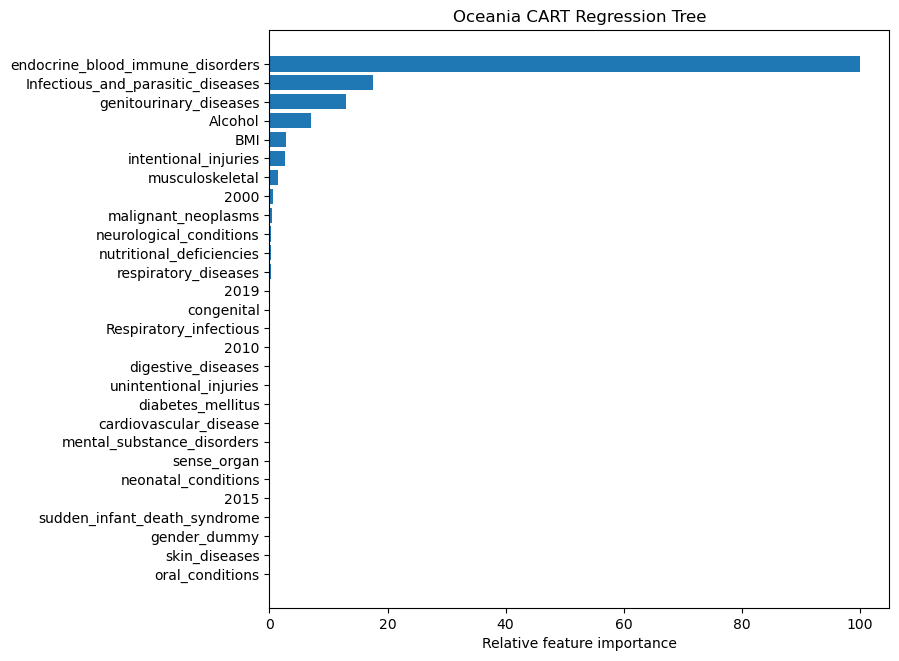

In [102]:
importance_plot(dtroc_cv_acc.best_estimator_, X_trainoc)
plt.title('Oceania CART Regression Tree')

Text(0.5, 1.0, 'Oceania CART Regression Tree')

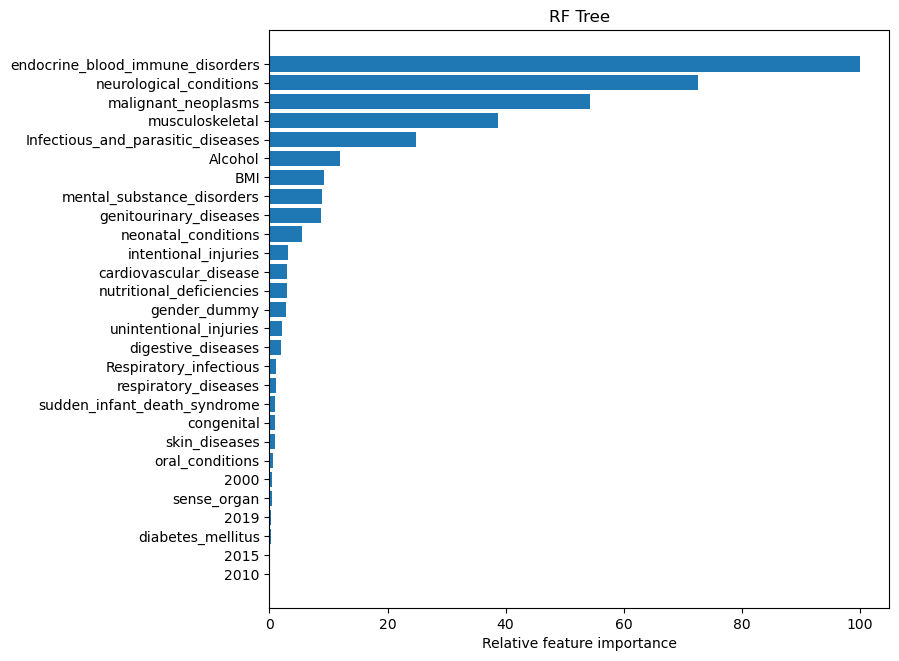

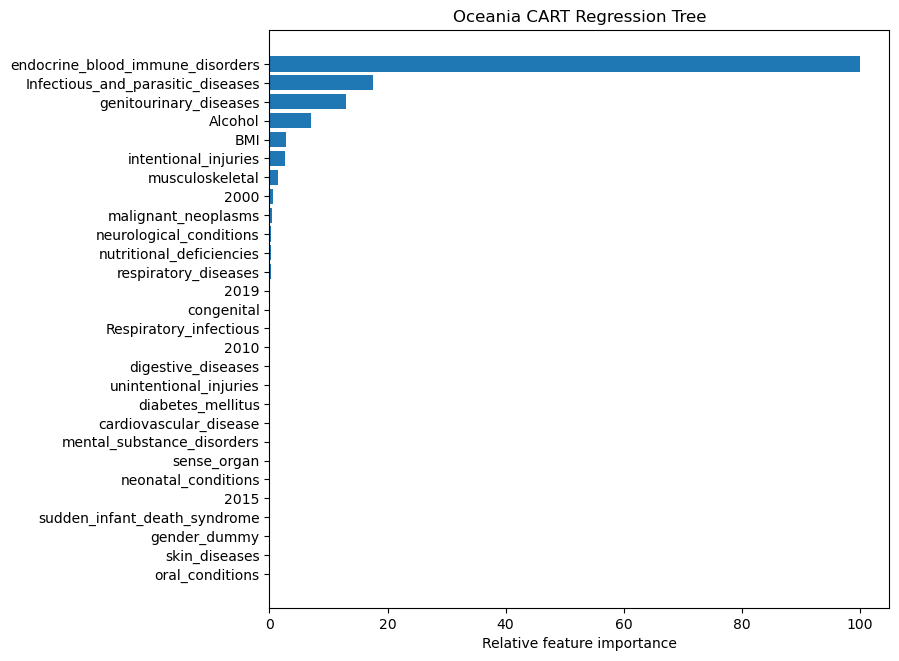

In [103]:
importance_plot(oc_rf, X_trainoc)
plt.title('RF Tree')
importance_plot(dtroc_cv_acc.best_estimator_, X_trainoc)
plt.title('Oceania CART Regression Tree')